In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
pip install -U scikit-learn

In [17]:
#from sklearn.preprocessing import StandardScaler, normalize
#from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 2)
PCA = pca.fit_transform(df)
PCA

array([[-75.71424916, -35.95494354],
       [-82.35846646,  28.90955895],
       [-74.63022933, -67.90963328],
       ...,
       [ 32.11298721,   3.37922193],
       [-80.21409513, -14.19059537],
       [-81.30834662,  21.6230423 ]])

In [39]:
PCA = PCA+100

In [56]:
import numpy as np

In [59]:
PCA2 = np.round(PCA, decimals = 4)
PCA2

array([[ 24.2858,  64.0451],
       [ 17.6415, 128.9096],
       [ 25.3698,  32.0904],
       ...,
       [132.113 , 103.3792],
       [ 19.7859,  85.8094],
       [ 18.6917, 121.623 ]])

In [40]:
PCA

array([[ 24.28575084,  64.04505646],
       [ 17.64153354, 128.90955895],
       [ 25.36977067,  32.09036672],
       ...,
       [132.11298721, 103.37922193],
       [ 19.78590487,  85.80940463],
       [ 18.69165338, 121.6230423 ]])

In [60]:
pca_df = pd.DataFrame(data = PCA2, columns=["pca1", "pca2"])
pca_df = pd.concat([pca_df,df['Outcome']],axis=1)
pca_df

,pca1,pca2,Outcome
0,24.2858,64.0451,1
1,17.6415,128.9096,0
2,25.3698,32.0904,1
3,111.0772,134.9002,0
4,189.7442,97.2487,1
...,...,...,...
763,199.2377,125.0830,0
764,21.3586,92.3142,0
765,132.1130,103.3792,0
766,19.7859,85.8094,1


In [ ]:
np.round(pca_df, decimales = 4)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

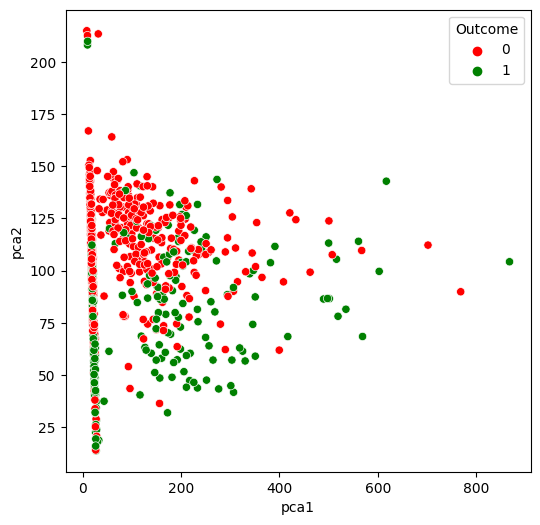

In [61]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "Outcome", data = pca_df,
                     palette = ["red", "green"])
plt.show()

In [13]:
pca_df.to_csv('Pca_diabetes.csv',encoding='utf-8',index=False)

In [70]:
pca_df.to_json('Pca_diabetes2.json',orient='index')

In [64]:
#este vale
pca_df.to_json('Pca_diabetes.json', orient = 'values', compression = 'infer')#, index = False)

In [65]:
pca_df[pca_df['pca1']==18.8948]

,pca1,pca2,Outcome
10,18.8948,98.7933,0


In [44]:
pca_df.describe()

,pca1,pca2,Outcome
count,768.000000,768.000000,768.000000
mean,100.000000,100.000000,0.348958
std,116.002490,30.541872,0.476951
min,8.496389,13.748708,0.000000
25%,19.778579,81.661154,0.000000
50%,50.410558,103.740402,0.000000
75%,149.584714,121.652477,1.000000
max,867.474310,214.929815,1.000000


In [67]:
points = pd.read_json('Pca_diabetes2.json')
points.head()

,pca1,pca2,Outcome
0,24.2858,64.0451,1
1,17.6415,128.9096,0
2,25.3698,32.0904,1
3,111.0772,134.9002,0
4,189.7442,97.2487,1


In [68]:
vector = list[points]
vector

list[         pca1      pca2  Outcome
0     24.2858   64.0451        1
1     17.6415  128.9096        0
2     25.3698   32.0904        1
3    111.0772  134.9002        0
4    189.7442   97.2487        1
..        ...       ...      ...
763  199.2377  125.0830        0
764   21.3586   92.3142        0
765  132.1130  103.3792        0
766   19.7859   85.8094        1
767   18.6917  121.6230        0

[768 rows x 3 columns]]

In [65]:
#points = points['pca1','pca2']
#arr=[]
arr = points.to_numpy()
arr2 = arr.tolist()
arr2

[[-75.71424916288801, -35.95494354165697, 1.0],
 [-82.35846645900573, 28.909558948596874, 0.0],
 [-74.63022933058492, -67.90963327522685, 1.0],
 [11.077205636601237, 34.900175189258015, 0.0],
 [89.74415565609065, -2.7512630639525644, 1.0],
 [-80.97811176577976, -3.9445646868106152, 0.0],
 [4.351325728473439, 46.92811624563139, 1.0],
 [-82.13748566764126, 7.099610546713798, 0.0],
 [468.8666992722583, -31.53002608982837, 1.0],
 [-80.1934508869437, -18.05247464197536, 1.0],
 [-81.10516104831682, -1.206742187894208, 0.0],
 [-75.74176234603252, -55.76195185079333, 1.0],
 [-78.71655341717086, -31.125520964542517, 0.0],
 [767.4743100192819, 4.266466454807738, 1.0],
 [98.75777096212524, -37.57096922909673, 1.0],
 [-83.68277648228992, 21.57152549224168, 1.0],
 [150.93979114082467, 16.192796375403244, 1.0],
 [-81.80936945511134, 4.424676132080613, 1.0],
 [2.024551521586256, 23.82885299289092, 0.0],
 [16.14884303690936, 7.795478862128912, 1.0],
 [156.30429123354384, 8.778675204439919, 0.0],
 [-82

In [59]:
data = [
    [40 ,70,1] ,
    [70 ,130,0] ,
    [90 ,40,0] ,
    [100 , 100,1] ,
    [140 ,110,0] ,
    [175 , 100,1] ,
    [150 , 30,0]
]

In [63]:
data

[[40, 70, 1],
 [70, 130, 0],
 [90, 40, 0],
 [100, 100, 1],
 [140, 110, 0],
 [175, 100, 1],
 [150, 30, 0]]